<a href="https://colab.research.google.com/github/Mikhail-Klochkov/ml_intro/blob/master/money_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
 

Mounted at /content/drive


In [4]:
! unzip '/content/drive/MyDrive/Colab_Notebooks/commodity_trade_statistics_data.csv.zip' -d data

Archive:  /content/drive/MyDrive/Colab_Notebooks/commodity_trade_statistics_data.csv.zip
  inflating: data/commodity_trade_statistics_data.csv  
  inflating: data/__MACOSX/._commodity_trade_statistics_data.csv  


In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('/content/data/commodity_trade_statistics_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data_cars = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cars_dataset.csv')

In [6]:
data_cars.isna().sum(axis = 0)

Unnamed: 0                                0
mark                                      0
Box                                       0
Drive_unit                                0
Seats                                     0
Doors                                     0
Country                                   0
Engine                                    0
Volume                                    0
Color                                     0
Mileage                                   0
Price                                     0
Year                                      0
Car_type                                  0
Generation                                0
Model                                     0
Drive                                   191
Boost_type                              283
Cylinder_location                       247
Front_brakes                            191
Engine_volume                             0
Width                                     0
Front_Suspension_type           

## ЗАДАНИЕ 1

In [454]:
data.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


У нас есть очень много пропусков в колонках weight_kg, and quantity. При этом можно углядеть, что ряд строк имеют значение 0 в колонке quantity при это есть информация о ненулковм значении стоимости данного вида товара. Это наводит на мысль, что по ряду потов товаров просто не было информации и значения заполнялись Nan и 0.0. 

Удалим те данные, строчки которых имеет 0 либо в weight_kg, либо в колонке quantity, при этом есть ненулевое значение суммы!!!

Также есть ряд строк, которые содержат Nan объекты!!!


In [455]:
data_short = data[['trade_usd', 'weight_kg', 'quantity']]
mask_non_logic_of_flows = (((data_short.quantity == 0) | (data_short.weight_kg == 0)) & (data_short.trade_usd != 0))
print('Относительное число "странных" данных: {:.1f} %'.format(100 * data_short[mask_non_logic_of_flows].shape[0]/data.shape[0]))

Относительное число "странных" данных: 4.4 %


In [456]:
# -- С учётом выбрасывания части "нелогичных" данных оставшая часть данных содержащаяя Nan -- #
print('Процентное значение количества данных, которые \
содержат в строке как минимум один Nan : {:.1f} %'.format((data_short[~mask_non_logic_of_flows].isna().sum(axis = 1) != 0).sum()*100/data_short.shape[0])) 


Процентное значение количества данных, которые содержат в строке как минимум один Nan : 4.2 %


In [457]:
data_new = data[~mask_non_logic_of_flows].copy(deep = True)
data_new = data_new.dropna()

In [458]:
print('Итго мы оставили после \
выкидывания "нелогичных" данных и Nan : {:.1f} %'.format(data_new.shape[0] * 100/data.shape[0]))

Итго мы оставили после выкидывания "нелогичных" данных и Nan : 91.4 %


In [459]:
data_new.isna().sum(axis = 0)

country_or_area    0
year               0
comm_code          0
commodity          0
flow               0
trade_usd          0
weight_kg          0
quantity_name      0
quantity           0
category           0
dtype: int64

In [460]:
unknown_columns = ['commodity', 'comm_code', 'quantity']
data_new.loc[0, ['weight_kg']].values / data_new.loc[0, ['quantity']].values

array([45.86274509803921], dtype=object)

In [461]:
# -- 1 -- #
cis_country = ['Azerbaijan',
               'Armenia',
               'Belarus', 
               'Georgia',
               'Kazakhstan', 
               'Kyrgyzstan',
               'Rep. of Moldova',
               'Russian Federation', 
               'Tajikistan',
               'Turkmenistan',
               'Uzbekistan',
               'Ukraine']

# -- Проверим есть ли они там -- #               
intersect = set(cis_country).intersection(data_new.country_or_area.unique())
print('В датасете присутствует не все страны из СНГ: {}, len: {}'.format(intersect,
                                                                                         len(intersect)))


В датасете присутствует не все страны из СНГ: {'Ukraine', 'Belarus', 'Rep. of Moldova', 'Armenia', 'Georgia', 'Kazakhstan', 'Russian Federation', 'Azerbaijan', 'Kyrgyzstan'}, len: 9


In [462]:
data_new['CIS'] = data_new.country_or_area.map(lambda x: int(x in intersect))

In [463]:
categories_word = data_new.category.unique()

In [464]:
categories_word


array(['01_live_animals', '02_meat_and_edible_meat_offal',
       '03_fish_crustaceans_molluscs_aquatic_invertebrates_ne',
       '04_dairy_products_eggs_honey_edible_animal_product_nes',
       '05_products_of_animal_origin_nes',
       '06_live_trees_plants_bulbs_roots_cut_flowers_etc',
       '07_edible_vegetables_and_certain_roots_and_tubers',
       '08_edible_fruit_nuts_peel_of_citrus_fruit_melons',
       '09_coffee_tea_mate_and_spices', '10_cereals',
       '11_milling_products_malt_starches_inulin_wheat_glute',
       '12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne',
       '13_lac_gums_resins_vegetable_saps_and_extracts_nes',
       '14_vegetable_plaiting_materials_vegetable_products_nes',
       '15_animal_vegetable_fats_and_oils_cleavage_products_et',
       '16_meat_fish_and_seafood_food_preparations_nes',
       '17_sugars_and_sugar_confectionery',
       '18_cocoa_and_cocoa_preparations',
       '19_cereal_flour_starch_milk_preparations_and_products',
       '20_vege

In [465]:
unique_word = {}
for idx, item in enumerate(categories_word):
  split = item.split('_')
  number, list_of_words = split[0] if idx >= 9 else split[0][1:], split[1 :]
  try:
    unique_word[int(number)] = set(list_of_words)
  except ValueError:
    unique_word[number] = set(list_of_words)


In [466]:
# -- Мы должны как-то найти те уникальные слова, которые соответствуют машиностроительной продукции -- #
start = 71
end = 91

category_of_machine = data_new.category.unique()[70: 90]

In [467]:
data_new['year'] = data_new.year.astype(int)
data_CIS = data_new[data_new['CIS'] == 1]
data_CIS_2014_2016 = data_CIS[(data_CIS.year >= 2014) & (data_CIS.year <= 2016)]
data_CIS_2014_2016.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,CIS
1479,Armenia,2015,10210,"Bovine animals, live pure-bred breeding",Import,798748,176651.0,Number of items,321.0,01_live_animals,1
1480,Armenia,2015,10210,"Bovine animals, live pure-bred breeding",Export,900,700.0,Number of items,20.0,01_live_animals,1
1481,Armenia,2015,10290,"Bovine animals, live, except pure-bred breeding",Export,1110382,604874.0,Number of items,3086.0,01_live_animals,1
1482,Armenia,2015,10391,"Swine, live except pure-bred breeding < 50 kg",Import,124,62.0,Number of items,15.0,01_live_animals,1
1483,Armenia,2015,10392,"Swine, live except pure-bred breeding > 50 kg",Import,109441,73590.0,Number of items,822.0,01_live_animals,1


In [468]:
# -- [2014 - 2016] and CIS country -- #
def unique_category(x):
  try:
    if(x.split('_')[0][0] == '0'):
      return int(x.split('_')[0][1:])
    else:
      return int(x.split('_')[0])
  except ValueError:
    # all -> -1
    return -1

indeces_of_mechanical_engineering = data_CIS_2014_2016.category.apply(lambda x: unique_category(x))

In [469]:
mask = ((indeces_of_mechanical_engineering >= start) & (indeces_of_mechanical_engineering <= end))
data_CIS_2014_2016_m = data_CIS_2014_2016[mask]

In [470]:
# -- first of table for answer -- #
table_1_ans = data_CIS_2014_2016_m[data_CIS_2014_2016_m.flow == 'Import'].groupby(by = ['country_or_area'])[['trade_usd', 'quantity']].sum()
table_1_ans.to_csv('/content/drive/MyDrive/Colab_Notebooks/table_1_ans.csv')

In [471]:
table_1_ans['trade_usd_per_milion'] = table_1_ans['trade_usd']//1e6
table_1_ans['quantity_per_milion'] = table_1_ans['quantity']//1e6

table_1_ans.drop(columns = ['trade_usd', 'quantity'], inplace=True)
table_1_ans.to_csv('/content/drive/MyDrive/Colab_Notebooks/table_1_ans.csv')


ОТВЕТ К ПЕРВОМУ ВОПРОСУ!!!

In [472]:
table_1_ans

,trade_usd_per_milion,quantity_per_milion
country_or_area,,
Armenia,3077.0,1033.0
Azerbaijan,6982.0,1608.0
Belarus,13412.0,11172.0
Georgia,427.0,83.0
Kazakhstan,3911.0,475.0
Kyrgyzstan,180.0,2.0
Rep. of Moldova,40.0,1.0
Russian Federation,20239.0,615.0
Ukraine,866.0,89.0


In [473]:
# -- 2 questions -- #
# -- mean weighted price of machine production -- #
# -- create mean price of product in each row -- #
data_CIS.loc[:, 'price_one_product'] = (data_CIS['trade_usd']/data_CIS['quantity']).values
data_CIS_2004_2016 = data_CIS[(data_CIS.year >= 2004) & (data_CIS.year <= 2016)]
data_CIS_2014_2016.columns
data_CIS_2004_2016.columns

Index(['country_or_area', 'year', 'comm_code', 'commodity', 'flow',
       'trade_usd', 'weight_kg', 'quantity_name', 'quantity', 'category',
       'CIS', 'price_one_product'],
      dtype='object')

Средневзвешанная цена рассчитывается из соображения того, что каждый тип товара categories имеет свой вес в расчёт средней цены. Вес для каждого типа товара рассчитывается из соображений отношения количества товаров определенной категории машиностроительной продукции к всему количеству товаров машиностроительного сегмента.

In [474]:

def get_data_machine_p(data):
  """
  data - pd.DataFrame 
  return data (pd.DataFrame) filtered by type of categories (start, end)
  """
  assert('category' in set(data.columns))
  index = data.category.apply(lambda x: unique_category(x))
  mask = ((index >= start) & (index <= end))
  return data[mask]

data_CIS_2004_2016_m = get_data_machine_p(data_CIS_2004_2016)
data_CIS_2004_2016_m.columns

Index(['country_or_area', 'year', 'comm_code', 'commodity', 'flow',
       'trade_usd', 'weight_kg', 'quantity_name', 'quantity', 'category',
       'CIS', 'price_one_product'],
      dtype='object')

In [475]:
mean_prices_by_cat = data_CIS_2004_2016_m.groupby(by = ['category'])['price_one_product'].mean()
mean_prices_by_cat

category
71_pearls_precious_stones_metals_coins_etc               1.194502e+04
72_iron_and_steel                                        6.747185e+00
73_articles_of_iron_or_steel                             2.096616e+01
74_copper_and_articles_thereof                           2.891329e+01
75_nickel_and_articles_thereof                           1.527662e+02
76_aluminium_and_articles_thereof                        1.178111e+01
78_lead_and_articles_thereof                             1.210372e+01
79_zinc_and_articles_thereof                             8.775057e+00
80_tin_and_articles_thereof                              3.316767e+01
81_other_base_metals_cermets_articles_thereof            3.667312e+02
82_tools_implements_cutlery_etc_of_base_metal            3.371356e+01
83_miscellaneous_articles_of_base_metal                  2.908871e+01
84_nuclear_reactors_boilers_machinery_etc                1.361961e+04
85_electrical_electronic_equipment                       5.708107e+03
86_railway_

In [476]:
weights_cat = data_CIS_2004_2016_m.groupby(by = ['category'])['category'].count()/data_CIS_2004_2016_m.shape[0]

СРЕДНЕВЗВЕШАННАЯ ЦЕНА ПО ЕДИНИЦЫ МАШИНОСТРОИТЕЛЬНОЙ ПРОДУКЦИИ В СНГ СТРАНАМ 2004-2016 ГОД.

In [477]:
# -- calculate mean weighted price of machine production -- #
ans_2 = np.sum(np.multiply(weights_cat.values, mean_prices_by_cat.values))/np.sum(weights_cat.values)
ans_2
print('mean weighted price of engineering products: {:.3f} ml'.format(ans_2/1e6))

mean weighted price of engineering products: 0.103 ml


In [478]:
# -- Russian Federation by 2012 - 2016 period top 5 categories of engeneering products -- #
# -- крупнейшиих видов продукции это те виды продукции число которых больше -- # 
data_rus = data_new[data_new.country_or_area == 'Russian Federation']
data_rus = data_rus[((data_rus.year >= 2012) & (data_rus.year <= 2016))]
data_rus.loc[:, 'price_one_product'] = (data_rus['trade_usd']/data_rus['quantity']).values


data_rus_m = get_data_machine_p(data_rus)
top_5 = data_rus_m.groupby(by = ['category'])['quantity'].count().sort_values(ascending=False)[:5]

In [479]:
top_5_categories = top_5.index.map(lambda x: int(x.split('_')[0])).values
top_5_categories

array([81, 86, 89, 75, 79])

In [480]:
# -- выделим те самые топ 5 промышленных продукций для расчёта среднего -- #
mask_top_5 = data_rus_m.category.apply(lambda x: unique_category(x) in set(top_5_categories)) 
table_2_ans = data_rus_m[mask_top_5].groupby(by = ['category'])['price_one_product'].mean()

In [481]:
# -- содержит среднюю цену единицы продукции -- #
table_2_ans 
table_2_ans.to_csv('/content/drive/MyDrive/Colab_Notebooks/table_2_ans.csv')

In [482]:
# -- enter answer here -- #

**Средневзвешанные цены на топ 5 крупнейших видов машиностроительной продукции**

In [483]:
table_2_ans

category
75_nickel_and_articles_thereof                           3.419129e+02
79_zinc_and_articles_thereof                             3.776387e+00
81_other_base_metals_cermets_articles_thereof            4.657274e+02
86_railway_tramway_locomotives_rolling_stock_equipmen    2.588208e+05
89_ships_boats_and_other_floating_structures             5.890511e+06
Name: price_one_product, dtype: float64

In [484]:
data_new.loc[:, 'price_one_product'] = (data_new['trade_usd']/data_new['quantity']).values


data_new.to_csv('/content/drive/MyDrive/Colab_Notebooks/data_preproccess.csv')

In [485]:
# -- простое аггрегирование с рассчётом count значений -- #
data_rus = data_new[data_new.country_or_area == 'Russian Federation']
data_rus_2004_2016 = data_rus[((data_rus.year >= 2004) & (data_rus.year <= 2016))]
data_rus_2004_2016.groupby(by = ['comm_code'])['comm_code'].count()

comm_code
10111     22
10119     27
10120      5
10210     25
10290     26
          ..
970200    19
970300    27
970400    24
970500    27
970600    18
Name: comm_code, Length: 722, dtype: int64

In [486]:
# -- проверить совпадают ли значения для weight_kg and quantity для 'Weight in kilograms'
pair = data_rus_2004_2016[data_rus_2004_2016.quantity_name == 'Weight in kilograms'][['weight_kg', 'quantity']]
assert((pair['weight_kg'] != pair['quantity']).sum() == 0)



In [487]:
# -- аггрегирование по первым 4-ём знакам от comm_code -- #
data_rus_2004_2016['comm_code_4'] = data_rus_2004_2016.comm_code.apply(lambda x: str(x)[:4]).astype(int)
table_3_ans = data_rus_2004_2016.groupby(by = ['comm_code_4', 'flow'])['trade_usd', 'quantity'].sum()

НИЖЕ ОТВЕТ НА 3 ВОПРОС В ВИДЕ ТАБЛИЧКИ. 
Я немного не понял вопрос, с одной стороны мне показалось, что надо саггрегировать по comm_code.

Ниже ещё я сделал несколько вариантов, которые можно использовать в качетсве ответа.

In [488]:
# -- это что-то с сгруппированным по comm_code -- #

table_3_ans['trade_usd'] //= 1e3
table_3_ans['quantity'] //= 1e3

table_3_ans.rename(columns = {'trade_usd': 'trade_usd_per_k',
                              'quantity': 'quantity_per_k'}, inplace = True)

table_3_ans

trade_usd_per_k  quantity_per_k
comm_code_4 flow                                      
1001        Export          39599192.0     193301352.0
            Import           1175387.0       6747921.0
            Re-Import           1312.0          7371.0
1002        Export            160731.0        809511.0
            Import             29836.0        267022.0
...                                ...             ...
9705        Import            133584.0          2331.0
            Re-Import             31.0            21.0
9706        Export               940.0             1.0
            Import             76179.0           244.0
            Re-Import            727.0             0.0

[756 rows x 2 columns]

Ниже приведены абсолютные показатели для России.

In [489]:
# -- просто показатели для all flows -- #
table_3_ans_01 = data_rus_2004_2016.groupby(by = ['flow'])['trade_usd', 'quantity'].sum()//1e6
table_3_ans_01.rename(columns = {'trade_usd': 'trade_usd_per_ml',
                              'quantity': 'quantity_per_ml'}, inplace = True)
table_3_ans_01

,trade_usd_per_ml,quantity_per_ml
flow,,
Export,343566.0,1162403.0
Import,252966.0,1408931.0
Re-Import,416.0,174.0


По моему мнению лучше посмотреть на графики значений всех flow по времени.

In [490]:
# -- По моему мнению лучше посмотреть на графики значений всех flow по времени -- #
# -- У России за это период есть информация только по Import, Export и одна колонка для Re-Import
flows_rus = data_rus_2004_2016.groupby(by = ['flow', 'year'])['trade_usd', 'quantity'].sum()
flows_rus

trade_usd      quantity
flow      year                           
Export    2004  14265269634  7.100707e+10
          2005  15407692852  8.227296e+10
          2006  19376792172  8.744871e+10
          2007  27769378488  1.001575e+11
          2008  31349517301  9.542614e+10
          2009  19649611581  1.026049e+11
          2010  24117663768  6.876607e+10
          2011  30332852842  7.869596e+10
          2012  36560979149  9.007368e+10
          2013  33811053659  8.658293e+10
          2014  34817366285  9.956086e+10
          2015  31666552051  9.925787e+10
          2016  24441691730  1.005490e+11
Import    2004   8883986569  2.270374e+10
          2005  10887087295  2.123581e+10
          2006  12411455051  2.362005e+10
          2007  16380784599  2.918778e+10
          2008  21864400289  2.353051e+10
          2009  15674948721  1.727886e+10
          2010  18091988874  1.010800e+10
          2011  25440098214  1.154911e+11
          2012  28528490427  2.391160e+11
          2013  30516645680  2.743223e+11
          2014  30492770943  2.367746e+11
          2015  18920412012  2.027958e+11
          2016  14872989101  1.927673e+11
Re-Import 2015    416841968  1.742536e+08

**Ответ на 4 в виде графиков за период времени представленный в условии USD**.

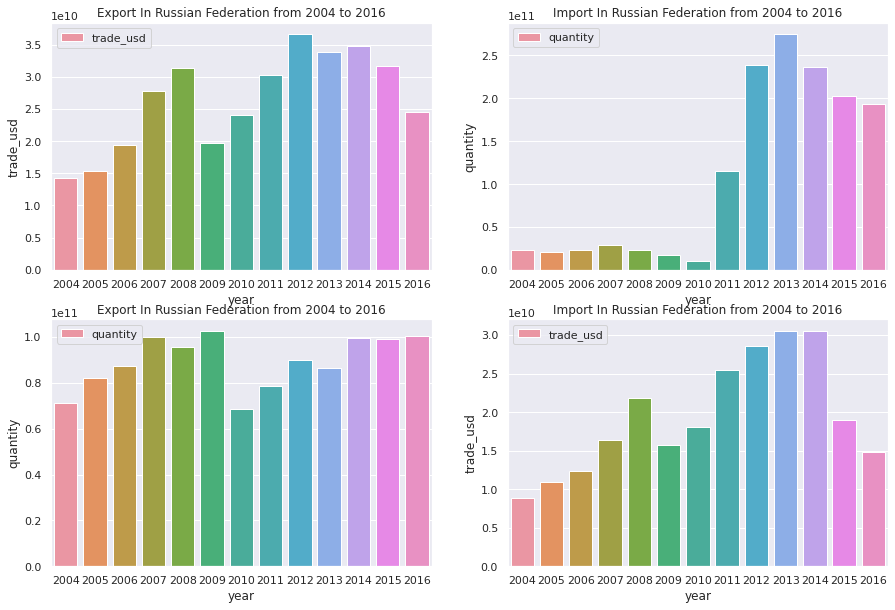

In [491]:
import seaborn as sns
import matplotlib.pyplot as plt

flows = ['Export', 'Import', 'Re-Import']
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
for idx, col in enumerate(flows_rus.columns):
  data_flow = flows_rus.loc[flows[idx], :].reset_index()
  sns.barplot(data = data_flow, 
              x = 'year', 
              y = col,
              label = '{}'.format(col),
              ax = ax[0][idx],
              )
  
  ax[0][idx].legend()
  ax[0][idx].set_title('{} In Russian Federation from 2004 to 2016'.format(flows[idx]))

for idx, (flow, col) in enumerate(zip(flows, flows_rus.columns[::-1])):
  sns.barplot(data = flows_rus.loc[flow, :].reset_index(),
              x = 'year',
              y = col,
              label= '{}'.format(col),
              ax = ax[1][idx],
              )
  ax[1][idx].legend()
  ax[1][idx].set_title('{} In Russian Federation from 2004 to 2016'.format(flow))

plt.show();


По данным графикам, отражающим зависимость Import/Export (Имеется ещё Re-Import но всего за один год, поэтому в рассмотрение не включён) в денежном и натуральном выражении (суммарно) с 2004 по 2016 год. Общее среди 3 графиков ((0,0), (1,0),(1,1)) является то, что 2010 год отличался падением вышеозвученных показателей по сравнению с наблюдаемым трендом роста особенно это видно на графиках (Import_trade_usd(year), Export_trade_usd(year))... Можно упомянуть отличие Импорта и Экспорта в натуральном выражении до 2010 года. А также в целом сказать про абсолютные значение, табличка выше.

In [492]:
# -- Уже на основе этих данных можно сказать что-то о тенденции в течении времени -- #

In [493]:
# -- 4 -- #
# -- Нам нужно просто добавить колонку trade_rub -- # 
# -- !Одна тонкость! необходимо перевести в соответствии с информацией о значениях, которые были актульны в то время -- #



In [494]:
data_new.year.unique()

array([2016, 2008, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988])

In [495]:
import string
dol_2_rub = "1992 288,00\
1993 928,30\
1994 2188,21\
1995 4553,89\
1996 5121,35\
1997 5785,04\
1998 9,73\
1999 24,61\
2000 28,12\
2001 29,17\
2002 31,35\
2003 30,69\
2004 28,81\
2005 28,29\
2006 27,19\
2007 25,58\
2008 24,86\
2009 31,72\
2010 30,37\
2011 29,39\
2012 31,09\
2013 31,85\
2014 38,42\
2015 60,96\
2016 67,03\
2017 58,35\
2018 62,71\
2019 64,74\
2020 72,15"

year_2_value = [(item[item.find(',') + 3: ], item[: item.find(',') + 3]) for item in dol_2_rub.split(' ')[1:]]
year_2_value

years =[year for year, _ in year_2_value]
values = [value.replace(',', '.') for _, value in year_2_value]

years.insert(0, '1992')
years.pop()
assert(years.__len__() == values.__len__())

# -- create dictionary of dollar to  rub -- #
dict_2_rub = {}

dict_2_rub = {year: value for year, value in zip(years, values)}
dict_2_rub
 



{'1992': '288.00',
 '1993': '928.30',
 '1994': '2188.21',
 '1995': '4553.89',
 '1996': '5121.35',
 '1997': '5785.04',
 '1998': '9.73',
 '1999': '24.61',
 '2000': '28.12',
 '2001': '29.17',
 '2002': '31.35',
 '2003': '30.69',
 '2004': '28.81',
 '2005': '28.29',
 '2006': '27.19',
 '2007': '25.58',
 '2008': '24.86',
 '2009': '31.72',
 '2010': '30.37',
 '2011': '29.39',
 '2012': '31.09',
 '2013': '31.85',
 '2014': '38.42',
 '2015': '60.96',
 '2016': '67.03',
 '2017': '58.35',
 '2018': '62.71',
 '2019': '64.74',
 '2020': '72.15'}

In [496]:
# -- create rub trade -- #
data_rus_2004_2016['trade_rub'] = data_rus_2004_2016.apply(lambda x: round(float(dict_2_rub[str(x['year'])]) * x['trade_usd'], 0), axis = 1)
data_rus_2004_2016.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,CIS,price_one_product,comm_code_4,trade_rub
41745,Russian Federation,2016,10111,"Horses, live pure-bred breeding",Export,802993,69660.0,Number of items,164.0,01_live_animals,1,4896.298780,1011,53824621.0
41746,Russian Federation,2016,10111,"Horses, live pure-bred breeding",Import,1394030,33893.0,Number of items,152.0,01_live_animals,1,9171.250000,1011,93441831.0
41747,Russian Federation,2016,10119,"Horses, live except pure-bred breeding",Export,331238,116919.0,Number of items,312.0,01_live_animals,1,1061.660256,1011,22202883.0
41748,Russian Federation,2016,10119,"Horses, live except pure-bred breeding",Import,957110,295896.0,Number of items,849.0,01_live_animals,1,1127.338045,1011,64155083.0
41749,Russian Federation,2016,10120,"Asses, mules and hinnies, live",Export,2152,1316.0,Number of items,3.0,01_live_animals,1,717.333333,1012,144249.0


  **Ответ на 4 в виде таблички по абсолютным значениям**.

In [497]:
# -- Абсолютные показатели за весь период -- #
table_4_ans_01 = data_rus_2004_2016.groupby(by = ['flow'])['trade_rub', 'quantity'].sum()//1e6
table_4_ans_01.rename(columns = {'trade_rub': 'trade_rub_per_ml',
                              'quantity': 'quantity_per_ml'}, inplace = True)
table_4_ans_01

,trade_rub_per_ml,quantity_per_ml
flow,,
Export,12230598.0,1162403.0
Import,8839090.0,1408931.0
Re-Import,25410.0,174.0


In [498]:
# -- По моему мнению лучше посмотреть на графики значений всех flow по времени -- #
# -- У России за это период есть информация только по Import, Export и одна колонка для Re-Import
flows_rus_rub = data_rus_2004_2016.groupby(by = ['flow', 'year'])['trade_rub', 'quantity'].sum()
flows_rus_rub

trade_rub      quantity
flow      year                            
Export    2004  4.109824e+11  7.100707e+10
          2005  4.358836e+11  8.227296e+10
          2006  5.268550e+11  8.744871e+10
          2007  7.103407e+11  1.001575e+11
          2008  7.793490e+11  9.542614e+10
          2009  6.232857e+11  1.026049e+11
          2010  7.324534e+11  6.876607e+10
          2011  8.914825e+11  7.869596e+10
          2012  1.136681e+12  9.007368e+10
          2013  1.076882e+12  8.658293e+10
          2014  1.337683e+12  9.956086e+10
          2015  1.930393e+12  9.925787e+10
          2016  1.638327e+12  1.005490e+11
Import    2004  2.559477e+11  2.270374e+10
          2005  3.079957e+11  2.123581e+10
          2006  3.374675e+11  2.362005e+10
          2007  4.190205e+11  2.918778e+10
          2008  5.435490e+11  2.353051e+10
          2009  4.972094e+11  1.727886e+10
          2010  5.494537e+11  1.010800e+10
          2011  7.476845e+11  1.154911e+11
          2012  8.869508e+11  2.391160e+11
          2013  9.719552e+11  2.743223e+11
          2014  1.171532e+12  2.367746e+11
          2015  1.153388e+12  2.027958e+11
          2016  9.969365e+11  1.927673e+11
Re-Import 2015  2.541069e+10  1.742536e+08

**Ответ на 4 в виде графиков за период времени представленный в условии RUS**.

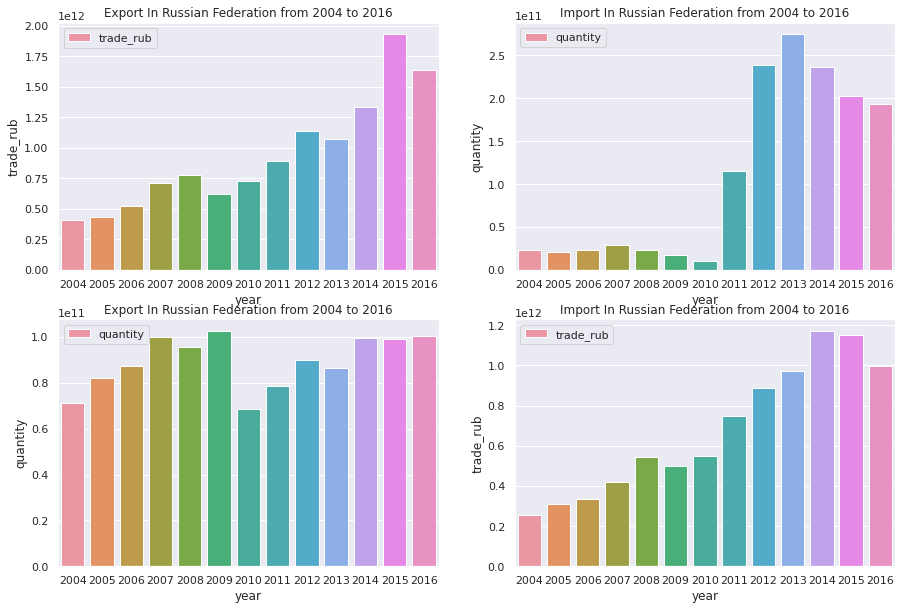

In [499]:
import seaborn as sns
import matplotlib.pyplot as plt

flows = ['Export', 'Import', 'Re-Import']
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
for idx, col in enumerate(flows_rus_rub.columns):
  data_flow = flows_rus_rub.loc[flows[idx], :].reset_index()
  sns.barplot(data = data_flow, 
              x = 'year', 
              y = col,
              label = '{}'.format(col),
              ax = ax[0][idx],
              )
  
  ax[0][idx].legend()
  ax[0][idx].set_title('{} In Russian Federation from 2004 to 2016'.format(flows[idx]))

for idx, (flow, col) in enumerate(zip(flows, flows_rus_rub.columns[::-1])):
  sns.barplot(data = flows_rus_rub.loc[flow, :].reset_index(),
              x = 'year',
              y = col,
              label= '{}'.format(col),
              ax = ax[1][idx],
              )
  ax[1][idx].legend()
  ax[1][idx].set_title('{} In Russian Federation from 2004 to 2016'.format(flow))

plt.show();


С 2004 по 2015 год мы наблюдаем рост Import, Export в денежном выражении, в 2016 году наблюдался небольшой упадок. Импорт и Экспорт в количественном выражении безусловно повторяет картину, что и у доллара (что очевидно, мы только поменяли денежное выражение с доллара на рубль).

In [500]:
# -- 6 -- #

# -- find ciggarets -- #
for number, words in unique_word.items():
  for word in words:
    if(word.find('tobacco') != -1):
      print(number, word, words)

24 tobacco {'and', 'substitutes', 'tobacco', 'manufactured'}


In [501]:
# -- we find only tobacco -- #
ind_ = 24

In [502]:
europe_union = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
   'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
   'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

set_europe_union = set(europe_union)
data_new['EU'] = data_new.country_or_area.apply(lambda x: (x in set_europe_union)).astype(int)

In [503]:
data_new.head(2)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,CIS,price_one_product,EU
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals,0,119.372549,0
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals,0,74.679245,0


In [504]:
data_eu_import = data_new[(data_new['EU'] == 1) & (data_new.flow == 'Import')]
# -- choose tobacco -- #
mask_tobacco = data_eu_import.category.apply(lambda x: x.split('_')[0] == '24').astype(bool)
data_eu_import_tobacco = data_eu_import[mask_tobacco]

In [505]:
# -- Мы выбрали пока tobacco теперь по столбцу commodity мы выберем строчки, которые содержат сиггареты -- #
# -- Заметим, что есть также Cigars, ciggarillos нам же нужно выбрать именно cigarettes, cigarette
def check_ciggaretes(x):
  """
  x - string of Commodity 
  """
  words = x.split(',')
  cigaretts_words = [word.lower() for word in words if word.lower().find('cigarett') != -1]
  if(len(cigaretts_words) != 0):
    return True

  else:
    return False

mask_of_cigarettes = data_eu_import_tobacco.commodity.apply(lambda x: check_ciggaretes(x))

In [506]:
data_eu_cigarettes = data_eu_import_tobacco[mask_of_cigarettes]
data_eu_cigarettes.head(4)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,CIS,price_one_product,EU
1963838,Austria,2015,240220,Cigarettes containing tobacco,Import,216286182,11810805.0,Weight in kilograms,11810805.0,24_tobacco_and_manufactured_tobacco_substitutes,0,18.312569,1
1963840,Austria,2015,240290,"Cigars, cheroots, cigarettes, with tobacco sub...",Import,39670,1717.0,Weight in kilograms,1717.0,24_tobacco_and_manufactured_tobacco_substitutes,0,23.104252,1
1963842,Austria,2015,240310,Cigarette or pipe tobacco and tobacco substitu...,Import,10694852,700795.0,Weight in kilograms,700795.0,24_tobacco_and_manufactured_tobacco_substitutes,0,15.261028,1
1963851,Austria,2014,240220,Cigarettes containing tobacco,Import,288794399,13431799.0,Weight in kilograms,13431799.0,24_tobacco_and_manufactured_tobacco_substitutes,0,21.500798,1


In [507]:
# -- Рассчитаем среднюю цену на сигареты по странам ЕС -- #
# -- Мы должны выбрать именно за 2016 год -- #
data_eu_cigarettes_2016 = data_eu_cigarettes[data_eu_cigarettes.year == 2016]


table_6_ans_01 = data_eu_cigarettes_2016.groupby(by = ['country_or_area'])['trade_usd'].mean().sort_values(ascending = False)
table_6_ans_01 = table_6_ans_01.reset_index()
table_6_ans_01['trade_usd'] //= 1e6
table_6_ans_01.rename(columns = {'trade_usd': 'trade_usd_per_ml'}, inplace = True)


**Ответ на 6 для цены по сигаретам по всем странам ЕС в течении периода, указанного в условии**.

In [508]:

# -- Конечная табличка по странам EU за 2016 год за сигратеы на Импорт -- #
table_6_ans_01
table_6_ans_01.to_csv('/content/drive/MyDrive/Colab_Notebooks/table_6_ans_01.csv')
table_6_ans_01

,country_or_area,trade_usd_per_ml
0,Italy,727.0
1,France,582.0
2,Germany,486.0
3,Spain,472.0
4,Netherlands,224.0
5,Belgium,203.0
6,Hungary,79.0
7,Sweden,78.0
8,Poland,76.0
9,Slovakia,71.0


Цена максимальна в Italy
Минимальная цена в Malta


In [509]:
# -- тенденция цен на сиггареты среди стран ЕС -- #
data_eu_cigarettes_2002 = data_eu_cigarettes[data_eu_cigarettes.year >= 2002]
series_price_on_cigarettes = data_eu_cigarettes_2002.groupby(by = ['country_or_area', 'year'])['trade_usd'].mean()


**НИЖЕ ПРОИЗВОДИТЬСЯ АНАЛИЗ ТЕНДЕНЦИИ ИЗМЕНЕНИЯ ЦЕН НА СИГАРЕТЫ ПО КАЖДОЙ ИЗ СТРАН ЕС**

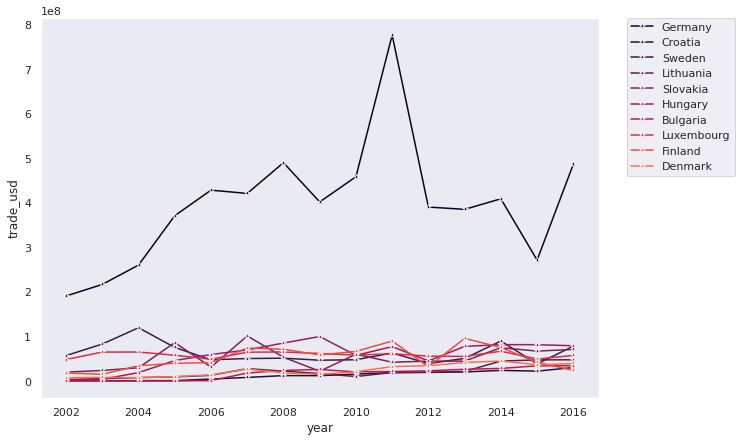

In [510]:
# -- Мы изобразим только около 10 тенденций для топ 10 стран по росту импорта сигаретт -- #

# -- выберем num стран для отображения -- #
countries_eu = series_price_on_cigarettes.index.get_level_values(0).unique()
num = 10
countries_choose = np.random.choice(countries_eu, num)

fig, ax = plt.subplots(figsize = (10, 7))
color_obj = sns.color_palette("rocket", as_cmap=True)
for idx, country in enumerate(countries_choose):
  data_country = series_price_on_cigarettes.loc[country, :].reset_index()
  sns.lineplot(data = data_country, 
               x = 'year',
               y = 'trade_usd',
               label = '{}'.format(data_country.country_or_area[0]),
               ax = ax,
               color = color_obj.colors[idx*20],
               marker = '*'
               )

ax.legend()
ax.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Чтобы сказать более содержательно относительно изменения цен в течении периода для стран ЕС. Построим тренды обычной линейно регрессией за период с 2002 года и по 2016 год. Конечно можно было бы более детально посмотреть на изменение цен, выделив, возможно какие-то локальные тренды, но у нас и так выборка небольшая ~ 10-15 точек для выделения тренда, вот если бы у нас были данные по месяцам, то можно было бы детальнее посомотреть.


country: Austria lr_coef_: 0.794
country: Ireland lr_coef_: 0.515
country: Lithuania lr_coef_: 0.889
country: Romania lr_coef_: -0.354
country: Spain lr_coef_: 0.097
country: Sweden lr_coef_: -0.229


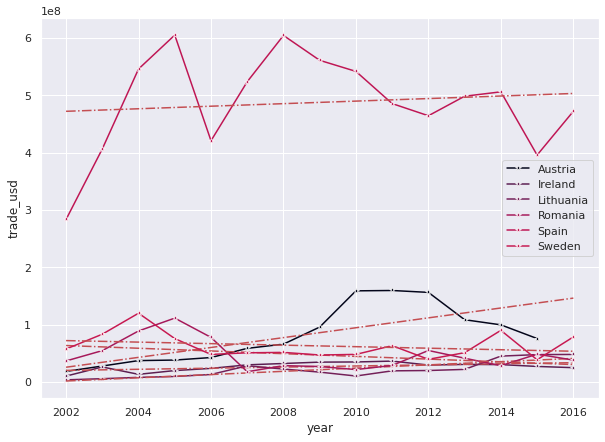

In [511]:
# -- Довольно сложна, смотря на один график сказать о тенденции цены для импорта среди стран Евросоюза, начиная с 2002 года -- #

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# -- Опять же построим несколько графиков 5 для демонстрации расчёта тренда -- #
num = 5
set_random_countries = set(np.random.choice(countries_eu, size = num+1))
countries_eu = series_price_on_cigarettes.index.get_level_values(0).unique()
fig, ax = plt.subplots(figsize = (10, 7))
country_coefs = {}

for idx, country in enumerate(countries_eu):
  data_country = series_price_on_cigarettes.loc[country, :].reset_index()
  X, y = data_country['year'].astype(np.float32).values[:, None], data_country['trade_usd'].astype(np.float32).values
  lr_for_build_graph = LinearRegression(fit_intercept = True)
  lr_for_coef = LinearRegression(fit_intercept = True)
  # -- Мы отдельно подсчитываем в эквивалентных масштабах значения коэффициента наклона, который говорит нам о положительном -- #
  # -- Или отрицательном тренде -- #

  minmax_X = MinMaxScaler()
  minmax_y = MinMaxScaler()

  X_m = minmax_X.fit_transform(X)
  y_m = minmax_y.fit_transform(y[:, None])

  lr_for_build_graph.fit(X, y)
  lr_for_coef.fit(X_m, y_m.squeeze())

  # -- Расчёт значений -- #
  country_coefs[country] = lr_for_coef.coef_[0]
  #  -- Отстроим только 5 случайно выбранных -- #
  if(country in set_random_countries):
    print('country: {} lr_coef_: {:.3f}'.format(country, lr_for_coef.coef_[0]))
    sns.lineplot(data = data_country, 
            x = 'year', 
            y = 'trade_usd', 
            label = '{}'.format(country),
            ax = ax,
            color = color_obj.colors[idx*5],
            marker = '*',
            )
    x_test = np.linspace(2002, 2016, 100)[:, None]  
    ax.plot(x_test, 
            lr_for_build_graph.predict(x_test), 
            c = 'r',
            linestyle = '-.')
    

Мы выделяем тренды LinearRegression и по наклону этой прямой мы можем (грубо) судить о тренде за период 2002 - 2016 год по странам ЕС. Так как в задании просят именно заиксировать НАИБОЛЬШИЙ рост цены, скорее всего подразумевается не абсолютное изменение цен по с 2002 по 2016 год, а темы роста, а на этот  вопрос логичнее отвечать оценив тренд, в качестве оценки обычно берут прямую. Это грубо, но всё-же.

In [512]:
# --  сгруппируем страны по 5-ём группам -- #
# -- 1 - coef_ [1, +inf] ~ выраженный положительный
# -- 2 - coef_ [-0.1, -0.1] ~ const 
# -- 3 - coef_ [-inf, -1] ~ выраженый отрицательный 
# -- 4 - coef_ [-1, -0.1] ~ средний отрицательный
# -- 5 - coef_ [0.1, 1] ~ средний положительный  

sorted(country_coefs.items(), key = lambda item : item[1], reverse = True)


[('Bulgaria', 1.1040021),
 ('Denmark', 1.0400068),
 ('Croatia', 1.0098529),
 ('Lithuania', 0.8893326),
 ('Belgium', 0.8534415),
 ('Portugal', 0.8322008),
 ('Poland', 0.8051637),
 ('Austria', 0.7935299),
 ('Netherlands', 0.7491514),
 ('Hungary', 0.71060276),
 ('Slovenia', 0.6191271),
 ('Ireland', 0.51531476),
 ('Italy', 0.45407817),
 ('Finland', 0.38928702),
 ('Estonia', 0.3873484),
 ('Slovakia', 0.37243873),
 ('Germany', 0.3214165),
 ('Latvia', 0.23014979),
 ('Cyprus', 0.18631232),
 ('France', 0.15507369),
 ('Malta', 0.118329346),
 ('Spain', 0.09671048),
 ('Luxembourg', -0.06318125),
 ('Greece', -0.11901788),
 ('Sweden', -0.22883038),
 ('Romania', -0.35406902)]

In [513]:
# 1 #
high_positive = {key: value for key, value in country_coefs.items() if value >= 1.}

# 3 #
high_negative = {key: value for key, value in country_coefs.items() if value <= -1.}

# 2 #
const = {key: value for key, value in country_coefs.items() if value >= -0.1 and value <= 0.1}

# 4 #
middle_positive = {key: value for key, value in country_coefs.items() if value <= 1. and value >= 0.1}

# 5 #
middle_negative = {key: value for key, value in country_coefs.items() if value <= -0.1 and value >= -1}




**НИЖЕ Я ВЫДЕЛИЛ ГРУППЫ СТРАН НА ОСНОВЕ АНАЛИЗА ТРЕНДА ЗА ФИКСИРОВАННЫЙ ПРОМЕЖУТОК ВРЕМЕНИ С 2002 ГОДА**

In [514]:
print('Выраженный  полж.: ', high_positive)

Выраженный  полж.:  {'Bulgaria': 1.1040021, 'Croatia': 1.0098529, 'Denmark': 1.0400068}


In [515]:
print('Выраженный  отриц.: ', high_negative)


Выраженный  отриц.:  {}


In [516]:
print('средний  полж.: ', middle_positive)


средний  полж.:  {'Austria': 0.7935299, 'Belgium': 0.8534415, 'Cyprus': 0.18631232, 'Estonia': 0.3873484, 'Finland': 0.38928702, 'France': 0.15507369, 'Germany': 0.3214165, 'Hungary': 0.71060276, 'Ireland': 0.51531476, 'Italy': 0.45407817, 'Latvia': 0.23014979, 'Lithuania': 0.8893326, 'Malta': 0.118329346, 'Netherlands': 0.7491514, 'Poland': 0.8051637, 'Portugal': 0.8322008, 'Slovakia': 0.37243873, 'Slovenia': 0.6191271}


In [517]:
print('средний  отриц.: ', middle_negative)


средний  отриц.:  {'Greece': -0.11901788, 'Romania': -0.35406902, 'Sweden': -0.22883038}


In [518]:
print('примерно константный: ', const)


примерно константный:  {'Luxembourg': -0.06318125, 'Spain': 0.09671048}


## ML часть Cars ЗАДАНИЕ 2

In [160]:
# -- ML part -- #

data_cars = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cars_dataset.csv')


Перемешаем наши данные перед анализом. 

In [161]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, ShuffleSplit
# -- train-test-split -- #
# -- На всякий случай перемешаем наши данные -- #
# df = data_cars.drop(columns = ['Price'])
seed = 42
np.random.seed(seed)
indexes = data_cars.index.tolist()
np.random.shuffle(indexes)

In [162]:
df = data_cars.sample(frac=1).reset_index(drop=True)
df.head()

,Unnamed: 0,mark,Box,Drive_unit,Seats,Doors,Country,Engine,Volume,Color,Mileage,Price,Year,Car_type,Generation,Model,Drive,Boost_type,Cylinder_location,Front_brakes,Engine_volume,Width,Front_Suspension_type,Diameter_cylinder_and_stroke_piston,Maximum_power,Length,Car_class,Wheelbase,Cylinders,Height,Fuel,Torque,Valves_per_cylinder,Volume_fuel_tank,Rear_track_width,Front_track_width,Curb_weight_kg,Clearance,Engine_Location,Maximum_speed,Wheel_size,Transmissions,Speed_to_100,Full_weight,Compression_ratio,Consumption,Engine_Power,Restyling,Release_start_series,End_Serial,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
0,7827,LADA (VAZ),mechanics,rear,5.0,4.0,Russia,gasoline,1.5,green,83000.0,77000.0,2002.0,Sedan,1976 – 2006,2106,NaN,NaN,NaN,NaN,2337.199911,1813.402914,NaN,0.0,0.0,4577.173249,B,2724.365421,4.743325,1579.989827,NaN,0.0,3.736626,63.83103,1543.233221,1543.408864,1571.717261,0.0,NaN,197.156414,NaN,5.655326,10.423527,2118.954231,11.149437,0.0,NaN,0.0,1976.0,2006.0,0.0,0.0,0.0,0.0,0.0
1,13755,Opel,automatic,front,5.0,3.0,German,gasoline,1.4,red,125000.0,645000.0,2012.0,Hatchback,J Restyling 2012 – 2017,Astra,front,turbocharging,in-line,disc ventilated,1364.000000,1840.000000,"independent, spring",72.5,140.0,4466.000000,C,2695.000000,4.000000,1482.000000,AI-95,200.0,4.000000,56.00000,1587.000000,1587.000000,1373.000000,145.0,"front, transverse",200.000000,225/55/R17 235/50/R18 235/45/R19 245/40/R20,6.000000,10.300000,1870.000000,9.500000,6.8,distributed injection (multi-point),1.0,2012.0,2017.0,380.0,1165.0,8.9,5.5,6.8
2,4124,Land Rover,automatic,full,5.0,5.0,UK,diesel,3.0,white,110000.0,2690000.0,2015.0,SUV,II 2013 – 2017,Range Rover Sport,full,turbocharging,V-type,disc ventilated,2993.000000,1983.000000,"independent, pneumatic element",84.0,249.0,4850.000000,J,2923.000000,6.000000,1780.000000,diesel,600.0,4.000000,77.00000,1685.000000,1690.000000,2115.000000,200.0,"front, longitudinal",210.000000,255/50/R19,8.000000,7.600000,2755.000000,16.100000,7.9,NaN,0.0,2013.0,2017.0,489.0,1761.0,9.8,6.8,7.9
3,9004,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,5.5,black,237000.0,1100000.0,2009.0,SUV,II (W164) Restyling 2008 – 2011,M-Class,full,no,V-type,disc ventilated,5461.000000,1911.000000,"independent, spring",98.0,388.0,4781.000000,J,2915.000000,8.000000,1815.000000,AI-95,530.0,4.000000,95.00000,1629.000000,1627.000000,2185.000000,200.0,"front, longitudinal",250.000000,255/50/R19,7.000000,5.800000,2830.000000,10.700000,12.8,distributed injection (multi-point),1.0,2008.0,2011.0,551.0,2050.0,17.6,10.0,12.8
4,32729,Toyota,variator,full,7.0,5.0,Japan,hybrid,2.4,gray,330000.0,900000.0,2003.0,Minivan,I 2002 – 2005,Alphard,full,no,in-line,disc ventilated,2362.000000,1840.000000,"independent, spring",88.5,131.0,4865.000000,M,2950.000000,4.000000,1900.000000,AI-95,190.0,4.000000,70.00000,1543.233221,1543.408864,2000.000000,160.0,central,197.156414,205/65/R16 225/55/R17,5.655326,10.423527,2440.000000,12.500000,0.0,distributed injection (multi-point),0.0,2002.0,2005.0,0.0,0.0,0.0,0.0,0.0


Разобъём наши данные на обучающую выборку и на тестовую выброку искуственно. Мы же как-то должны оценивать качество нашего алгоритма!

In [163]:
# -- Мы перемешали наш датасет -- #
# -- Разобъём его на Train and Test -- #
test_size = 0.3
index_split = np.arange(df.shape[0])[int((1-test_size)*df.shape[0])]

# -- train_test -- #
df_train = df.iloc[: index_split+1, :] # Это мои train_data
df_test = df.iloc[index_split+1: , :] # Эти данные даны без колонки price аналог public board kaggle
y_test = df_test['Price']
df_test = df_test.drop(columns = ['Price'])

В соотношении 70 % и 30 %, обучающая выборка и тестовая соответственно. 

In [164]:
print('train shape: {:.3f} % of all dataset'.format(df_train.shape[0]*100/df.shape[0]))
print('test shape: {:.3f} % of all dataset'.format(df_test.shape[0]*100/df.shape[0]))


train shape: 70.003 % of all dataset
test shape: 29.997 % of all dataset


In [165]:
# -- EDA of data -- #

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15892 entries, 0 to 15891
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           15892 non-null  int64  
 1   mark                                 15892 non-null  object 
 2   Box                                  15892 non-null  object 
 3   Drive_unit                           15892 non-null  object 
 4   Seats                                15892 non-null  float64
 5   Doors                                15892 non-null  float64
 6   Country                              15892 non-null  object 
 7   Engine                               15892 non-null  object 
 8   Volume                               15892 non-null  float64
 9   Color                                15892 non-null  object 
 10  Mileage                              15892 non-null  float64
 11  Price                       

In [166]:
numeric_columns = df_train.select_dtypes(np.number).columns
categorical_columns = df_train.select_dtypes(['object']).columns


In [167]:
numeric_columns

Index(['Unnamed: 0', 'Seats', 'Doors', 'Volume', 'Mileage', 'Price', 'Year',
       'Engine_volume', 'Width', 'Diameter_cylinder_and_stroke_piston',
       'Maximum_power', 'Length', 'Wheelbase', 'Cylinders', 'Height', 'Torque',
       'Valves_per_cylinder', 'Volume_fuel_tank', 'Rear_track_width',
       'Front_track_width', 'Curb_weight_kg', 'Clearance', 'Maximum_speed',
       'Transmissions', 'Speed_to_100', 'Full_weight', 'Compression_ratio',
       'Consumption', 'Restyling', 'Release_start_series', 'End_Serial',
       'Trunk_volume_max', 'Trunk_volume_min', 'Expense_city', 'Expense_track',
       'Consumption_average'],
      dtype='object')

Посмотрим на уникальные переменные для категориальных признаков. Если их слишком много, то предсказательная модель будет сложнее, например, если делать one-hot-encoding.

In [168]:
# -- Посмотрим на категориальные признаки и посмотрим на количество уникальных по каждой колонке -- #
unique_counts = {}
for idx, col in enumerate(df_train.select_dtypes(['object'])):
  unique_counts[col] = df_train.loc[:, col].unique().__len__()
print('Число уникальных значений категориальных признаков в тренировочных данных')
unique_counts

Число уникальных значений категориальных признаков в тренировочных данных


{'Boost_type': 4,
 'Box': 4,
 'Car_class': 10,
 'Car_type': 17,
 'Color': 16,
 'Country': 17,
 'Cylinder_location': 7,
 'Drive': 4,
 'Drive_unit': 3,
 'Engine': 5,
 'Engine_Location': 5,
 'Engine_Power': 6,
 'Front_Suspension_type': 8,
 'Front_brakes': 5,
 'Fuel': 8,
 'Generation': 1138,
 'Model': 745,
 'Wheel_size': 652,
 'mark': 85}

In [169]:
# -- понятно, что категоризовать one-hot или Label encoding стоит какие-то признаки, которые не слишком много имеют уникальных значений -- #
# -- Пока не особо понятно что оставить, можно попробовать убрать значения с экстремально большим количеством уникальных знач -- #s
# -- drop: -- #

dict_cat_variables = {'Boost_type': 4,
 'Box': 4,
 'Car_class': 10, 
 'Car_type': 17, # Не ясно, что за колонка
 #'Color': 16, # color drop (Маловероятно, что хорошо коррелирует с ценой)
 'Country': 17, # Страна по выпуску автомобилей должна влиять, все мы знаем, что Немецкие/Японцкие/Итальянские/Английские автомобили дорогие
 #'Cylinder_location': 7, # drop (Аналогично)
 'Drive': 4, 
 'Drive_unit': 3,
 'Engine': 5,
 'Engine_Location': 5,
 'Engine_Power': 6,
 'Front_Suspension_type': 8,
 'Front_brakes': 5,
 'Fuel': 8, # Тип бензина, по идее более дорогие машины заправляются на более высоких значениях
 #'Generation': 1138, # drop (Слишком много уникальных)
 #'Model': 745, # (Слишком много уникальных)
 #'Wheel_size': 652, # (Слишком много уникальных и размер колеса тоже странный)
 'mark': 85} # Есть вера, что марка должна хорошо коррелировать с ценой, возможно стоит сделать One-hot

Признаков очень много, уберём среди категориальных признаков часть, которые отвечают большому числу уникальных значений, а также те признаки, которые (как нам кажется) не имееют значительного влияния на предсказывание цен автомобилей. Вообще говоря это надо проверить, но для простоты пока опустим ряд категориальных признаков. 

In [170]:
drop_columns_categorical = ['Color', 'Cylinder_location',
                            'Generation', 'Model',
                            'Wheel_size',
                            'Front_Suspension_type',
                            'Engine_Power','Front_brakes', 'Unnamed: 0']

df_test = df_test.drop(columns = drop_columns_categorical)
df_train = df_train.drop(columns = drop_columns_categorical)


In [171]:
# -- Функция, которой будет удобно пользоваться, чтобы разом провести весь необходимый предпроцессинг -- #
def preprocessing(df, drop_columns, test = False):
  """
  Мы принимаем датасет и преобразуем его для дальнейшего анализа 
  """
  df_new = df.copy(deep = True)
  # -- drop section -- #
  df_new = df_new.drop(columns = drop_columns)

  return df_new


In [172]:
# -- Пока изучим численные данные -- #

df_train_numeric = df_train.select_dtypes(np.number)
df_test_numeric = df_test.select_dtypes(np.number)


## Missing numerical data

Проверим наши данные на наличие пропусков.

In [173]:
# -- missing values in numeric variables for train part -- #

print('Число пропусков в численнх признаков для train:')
df_train_numeric.isna().sum(axis = 0)

Число пропусков в численнх признаков для train:


Seats                                  0
Doors                                  0
Volume                                 0
Mileage                                0
Price                                  0
Year                                   0
Engine_volume                          0
Width                                  0
Diameter_cylinder_and_stroke_piston    0
Maximum_power                          0
Length                                 0
Wheelbase                              0
Cylinders                              0
Height                                 0
Torque                                 0
Valves_per_cylinder                    0
Volume_fuel_tank                       0
Rear_track_width                       0
Front_track_width                      0
Curb_weight_kg                         0
Clearance                              0
Maximum_speed                          0
Transmissions                          0
Speed_to_100                           0
Full_weight     

In [174]:

print('Число пропусков в численнх признаков для test:')
df_test_numeric.isna().sum(axis = 0)

Число пропусков в численнх признаков для test:


Seats                                  0
Doors                                  0
Volume                                 0
Mileage                                0
Year                                   0
Engine_volume                          0
Width                                  0
Diameter_cylinder_and_stroke_piston    0
Maximum_power                          0
Length                                 0
Wheelbase                              0
Cylinders                              0
Height                                 0
Torque                                 0
Valves_per_cylinder                    0
Volume_fuel_tank                       0
Rear_track_width                       0
Front_track_width                      0
Curb_weight_kg                         0
Clearance                              0
Maximum_speed                          0
Transmissions                          0
Speed_to_100                           0
Full_weight                            0
Compression_rati

Нам повезло, пропущенных значений для численных признаков нет.
Посмотрим на то, как коррелируют наши численные признаки между собой. Это очень важная часть анализа, так как для линейных моделей (LinearRegression) очень важно отсутсвие сильно коррелированных признаков. Во-первых это только усложняет модель и делает данные избыточными, во-вторых возникает проблема мультиколлинеарности, что очень плохо для линейных моделей. 

## Анализ на основе матрицы Корреляций

In [175]:
def replace_target_columns(df, col_replace = 'Price'):
  """
  Ставит колонку col_replace в конец
  """

  cols = df.columns
  cols_new = [col for col in cols if col != 'Price'] + ['Price']
  df = df.reindex(columns = cols_new)
  return df

df_train_numeric = replace_target_columns(df_train_numeric)
df_train = replace_target_columns(df_train)


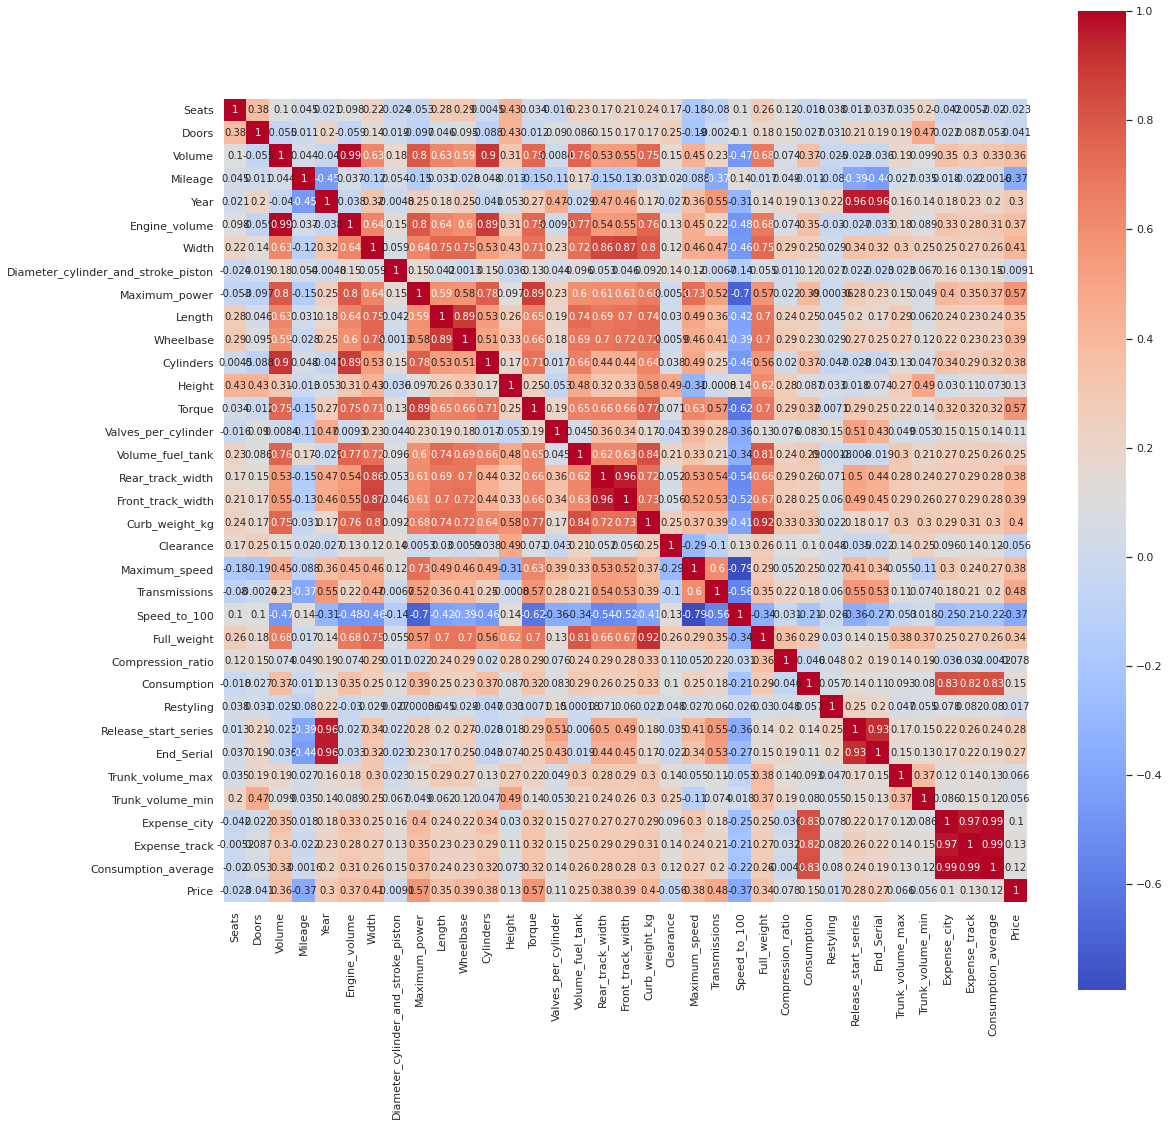

In [176]:
# -- Матрица корреляций -- #
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(18, 18))
cross_matrix = df_train.corr()
sns.heatmap(cross_matrix, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

Мы видим очень много признаков, которые сильно между собой скоррелированы. Нам необходимо удалить ряд колонок по следующему принципу. Среди пары сильно скоррелированных признаков оставляем только один признак, который сильнее скоррелирован с целевым столбцом (Price).

In [177]:
# -- Построим сводную таблицу с скоррелированными признаками -- #
corr_table = df_train_numeric.corr().abs().unstack().sort_values(ascending = False).reset_index()
corr_table.rename(columns = {"level_0": "Feature_1", "level_1": "Feature_2", 0: 'corr_coef'}, inplace=True)
corr_table.drop(index = corr_table[corr_table.corr_coef == 1.].index, inplace = True)
corr_table = corr_table.iloc[::2, :]
threshold = 0.85 # Будем считать, что начиная с этого значения признаки неплохо скоррелированы 
#corr_table.reindex(labels = np.arange(corr_table.shape[0]))
сorr_table = corr_table[corr_table.corr_coef > threshold]

# -- Удалим ряд коррелированных признаков -- #

drop_high_corr_features = []
drop_high_corr_features_set = set()

for idx in corr_table.index:

  f1, f2, corr = corr_table.loc[idx, :]
  if(not (f1 == 'Price' or f2 == 'Price')):
    mask1 = ((corr_table.Feature_1 == f1) & (corr_table.Feature_2 == 'Price')) |\
                                            ((corr_table.Feature_2 == f1) & (corr_table.Feature_1 == 'Price'))
    mask2 = ((corr_table.Feature_1 == f2) & (corr_table.Feature_2 == 'Price')) |\
                                            ((corr_table.Feature_2 == f2) & (corr_table.Feature_1 == 'Price'))

    corr1 = corr_table[mask1].corr_coef.values
    corr2 = corr_table[mask2].corr_coef.values

    # -- corr1 and corr2 это корреляции с целевым признаком для признаков f1, f2, рассматриваемых на данный момент -- #
    # -- drop менее скоррелированный признак с целевой переменно1 -- #
    drop_high_corr_features.append(f1 if corr1 > corr2 else f2)
    drop_high_corr_features_set.add(f1 if corr1 > corr2 else f2)

drop_high_corr_features_set


{'Clearance',
 'Compression_ratio',
 'Consumption',
 'Consumption_average',
 'Curb_weight_kg',
 'Cylinders',
 'Doors',
 'End_Serial',
 'Engine_volume',
 'Expense_city',
 'Expense_track',
 'Front_track_width',
 'Full_weight',
 'Height',
 'Length',
 'Maximum_power',
 'Maximum_speed',
 'Mileage',
 'Rear_track_width',
 'Release_start_series',
 'Restyling',
 'Seats',
 'Speed_to_100',
 'Torque',
 'Transmissions',
 'Trunk_volume_max',
 'Trunk_volume_min',
 'Valves_per_cylinder',
 'Volume',
 'Volume_fuel_tank',
 'Wheelbase',
 'Width',
 'Year'}

In [178]:
drop_high_corr = list(drop_high_corr_features_set)
# -- no correlate features -- #
set(df_train_numeric.columns).difference(drop_high_corr)


{'Diameter_cylinder_and_stroke_piston', 'Price'}

In [179]:
# -- top correlate with Price -- #
corr_table = df_train_numeric.corr().abs().unstack().sort_values(ascending = False).reset_index()
corr_table.rename(columns = {"level_0": "Feature_1", "level_1": "Feature_2", 0: 'corr_coef'}, inplace=True)
corr_table.drop(index = corr_table[corr_table.corr_coef == 1.].index, inplace = True)
corr_table = corr_table.iloc[::2, :]

nums_top = 10
mask_price = ((corr_table.Feature_1 == 'Price') | (corr_table.Feature_2 == 'Price'))
top_corr_table = corr_table[mask_price].sort_values(by = 'corr_coef', ascending = False)[:10]

print('Наиболее скоррелированные признаки с Price: ')
print(top_corr_table)
top_features = set(top_corr_table.Feature_1).union(top_corr_table.Feature_2)
top_features = top_features.difference(['Price'])
top_features

Наиболее скоррелированные признаки с Price: 
             Feature_1         Feature_2  corr_coef
205             Torque             Price   0.572119
209      Maximum_power             Price   0.565977
267      Transmissions             Price   0.477135
315              Price             Width   0.414390
323     Curb_weight_kg             Price   0.400379
331          Wheelbase             Price   0.391429
339  Front_track_width             Price   0.386444
341              Price  Rear_track_width   0.384947
343      Maximum_speed             Price   0.382457
347          Cylinders             Price   0.381379


{'Curb_weight_kg',
 'Cylinders',
 'Front_track_width',
 'Maximum_power',
 'Maximum_speed',
 'Rear_track_width',
 'Torque',
 'Transmissions',
 'Wheelbase',
 'Width'}

Видим, что по прежнему мы имеем много сильно скоррелированных признаков. Что не очень хорошо, например для Линейных моделей. Этот факт можно нивилировать введением регуляризации, которая бореться с этим Ridge Regression. Либо использовать модели, для которых это не тву существенно. 

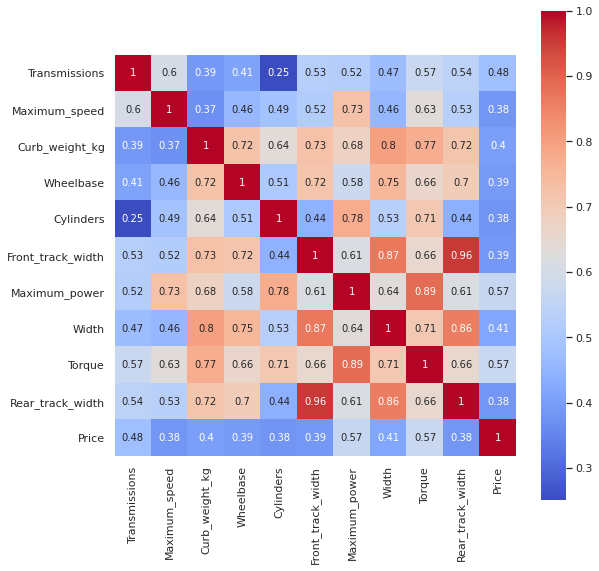

In [180]:
df_train_numeric_top = df_train_numeric.loc[:, list(top_features) + ['Price']]
# -- Снова посмотрим на матрицу корреляций -- # 
# -- На признаках, которые более всего скоррелированы с Price -- #

fig, axs = plt.subplots(figsize=(9, 9))
cross_matrix = df_train_numeric_top.corr()
sns.heatmap(cross_matrix, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

In [315]:
# -- delete over 85 -- #
cols_numeric_selection = ['Transmissions', 
                         'Maximum_speed', 
                         'Curb_weight_kg',
                         'Wheelbase',
                         'Cylinders',
                         'Front_track_width',
                         'Price']

Попробуем на число численных признаках без категориальных. 

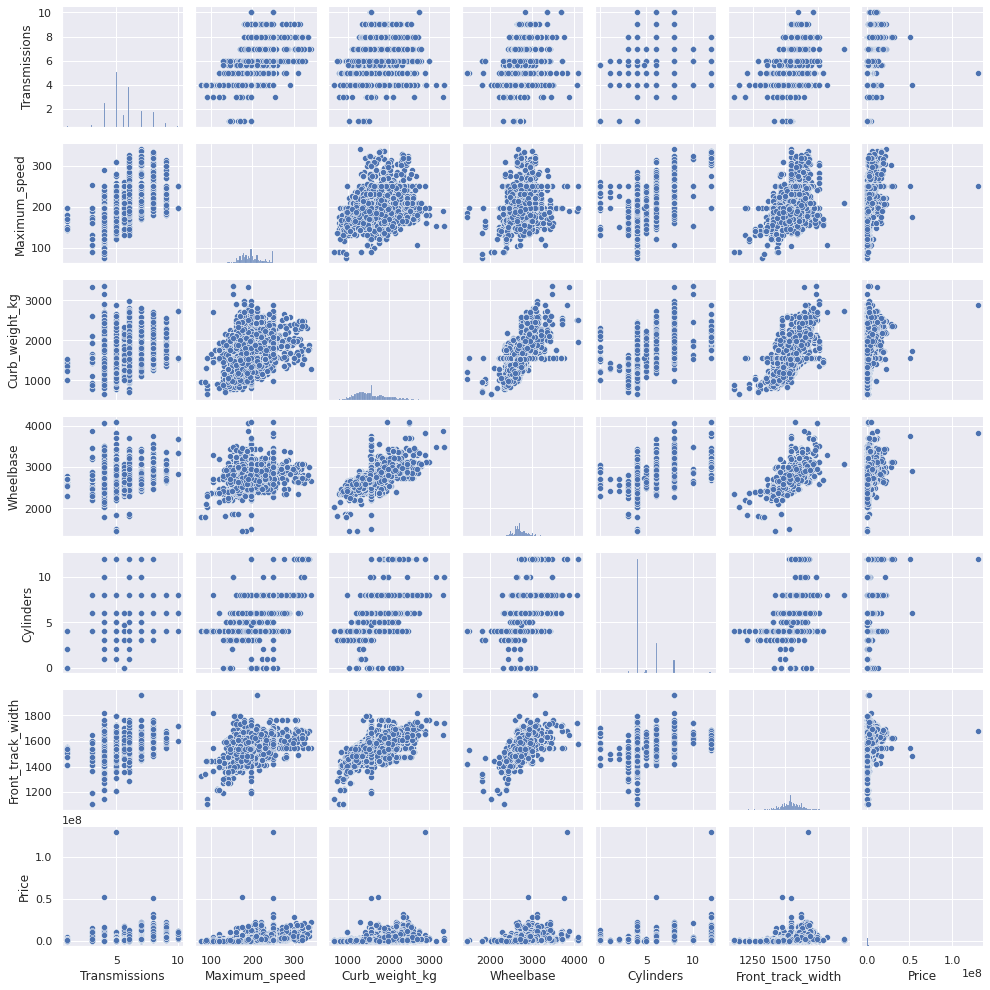

In [149]:

sns.set()
sns.pairplot(df_train[cols_numeric_selection], height = 2.)
plt.show();

Попутно на графике выше мы видим ряд выбросов у Price 3 экстремально больших значения! Их нужно удалить! Outliers.

Сильно skew data  Для этого преобразуем в log(x + 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


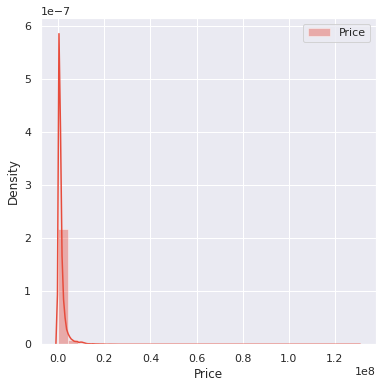

In [183]:
fig, ax = plt.subplots(figsize = (6, 6))
sns.distplot(df_train[cols_numeric_selection].Price, 
             label = 'Price', color = '#e74c3c',
             hist = True,
             bins = 30,
             ax= ax,
             );
ax.legend()
plt.show();

Мы желаем, чтобы наши данные были Normal distribution.
Для распределений имеющих длинный правый хвост целесообразно производить log(x + 1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


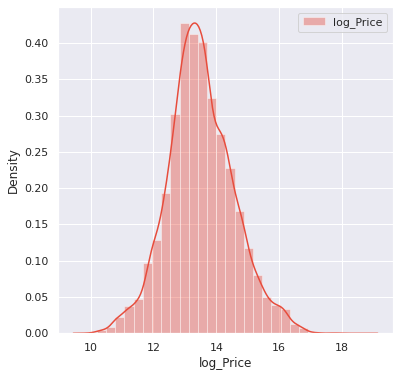

In [184]:
fig, ax = plt.subplots(figsize = (6, 6))

# -- log(Price + 1) -- #
df_train['log_Price'] = np.log1p(df_train.Price)
sns.distplot(df_train.log_Price, 
             label = 'log_Price', color = '#e74c3c',
             hist = True,
             bins = 30,
             ax= ax,
             );
ax.legend()
plt.show();

Поработаем с выбросами

In [195]:
# -- outliers -- #
index_outliers_price = df_train.Price.sort_values(ascending = False)[:3].index
index_outliers_curb_kg = df_train.Curb_weight_kg.sort_values(ascending = False)[:10].index
index_outliers_front_track_width = df_train.Front_track_width.sort_values(ascending = False)[:10].index
index_outliers_wheel_base = df_train.Wheelbase.sort_values(ascending = False)[:10].index


In [196]:
# -- remove from train data outliers -- #
index_all_outliers = index_outliers_curb_kg.union(index_outliers_front_track_width).union(index_outliers_price).union(index_outliers_wheel_base)
df_train = df_train.drop(labels = index_all_outliers)
#index_all_outliers

После удаления выбросов по ряду численных колонок. 

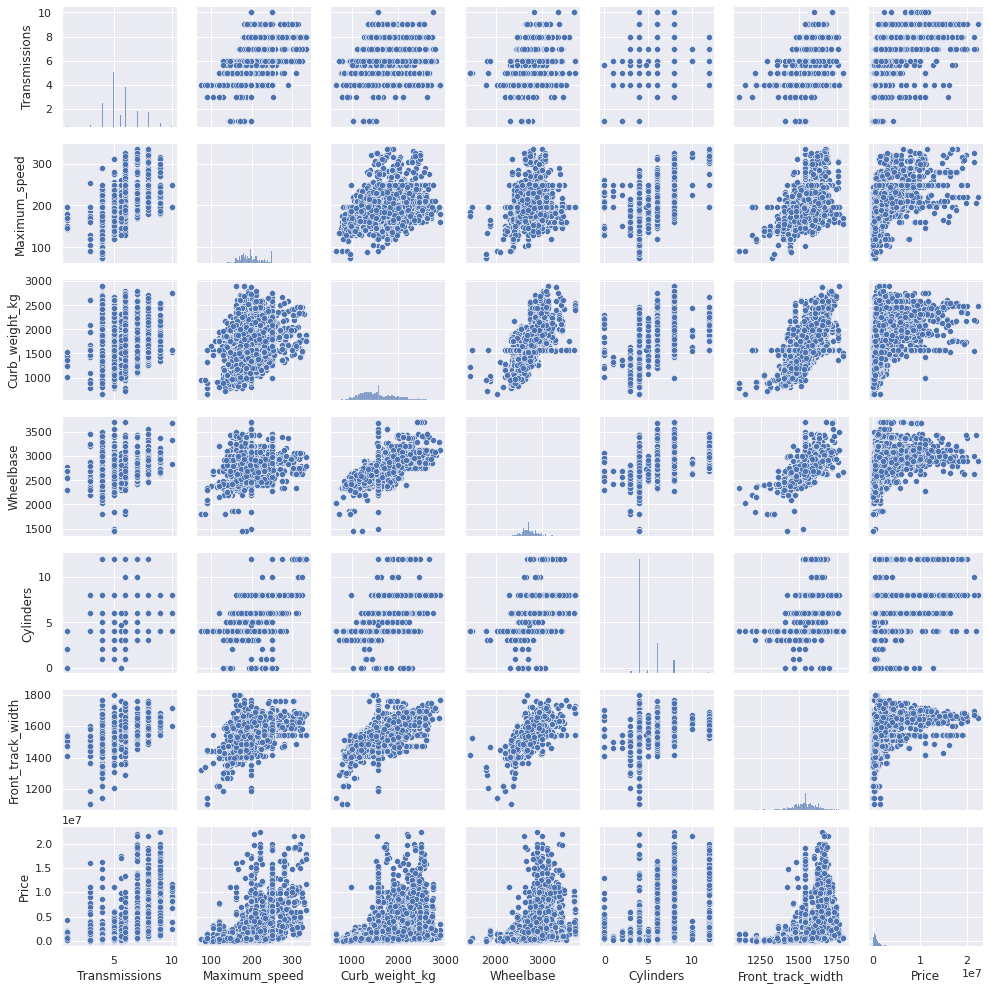

In [197]:

sns.set()
sns.pairplot(df_train[cols_numeric_selection], height = 2.)
plt.show();

Вообще для линейной модели очень важно, чтобы признаки были распределены ближе к нормальному распределению.

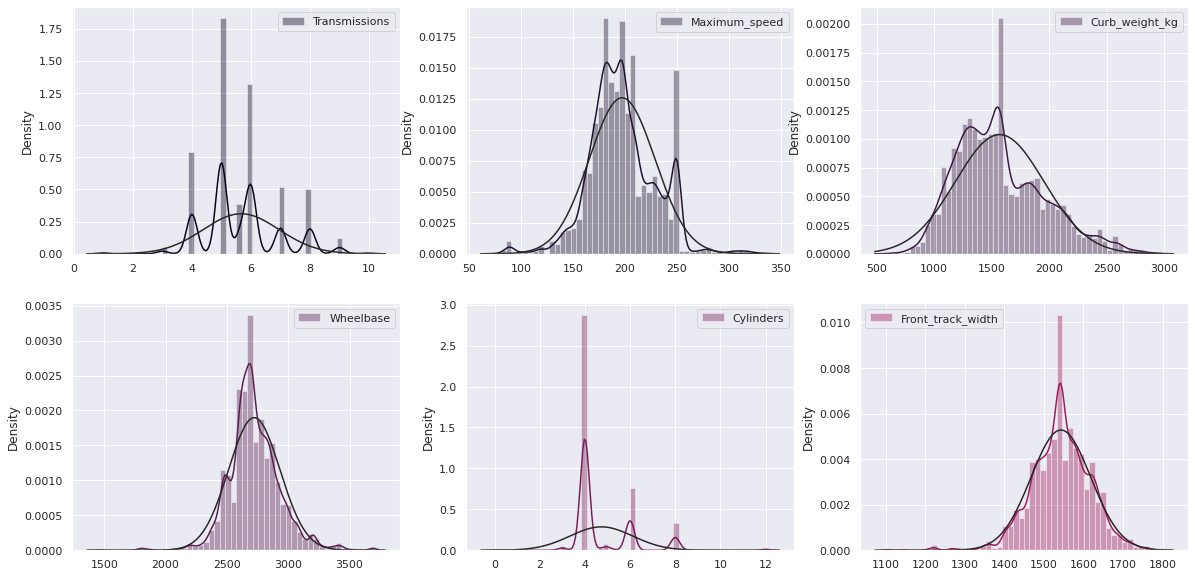

In [204]:
from scipy.stats import norm
import warnings 
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(2, 3, figsize = (20, 10))
color_obj = sns.color_palette("rocket", as_cmap=True)

ax = ax.flatten()
for idx, col in enumerate(df_train[cols_numeric_selection]):
  if(col != 'Price'):
    sns.distplot(df_train[col].values, 
                  hist = True, 
                  label = '{}'.format(col),
                  color = color_obj.colors[idx * 20],
                  ax = ax[idx],
                  fit = norm,
                  )
    
    ax[idx].grid(True)
    ax[idx].legend()
plt.show();

In [207]:
# -- Linear model -- #
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Ridge

Тут только 5 признаков отобранных


In [316]:
#  -- only numerical data -- #

cols_numeric_selection = cols_numeric_selection + ['log_Price']

X_train = df_train[cols_numeric_selection + ['log_Price']].drop(columns = ['log_Price', 'Price'])
y_train = df_train['log_Price'].values

param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 10),
}
pipe = Pipeline(
    [('std', StandardScaler()),
     ('ridge', Ridge()),
     ]
)
cv = KFold(n_splits = 10, shuffle = True)
grid = GridSearchCV(pipe, 
                    param_grid = param_grid,
                    scoring = 'neg_mean_squared_log_error', 
                    cv = cv)

grid.fit(X_train, y_train)
#df_train[cols_numeric_selection].columns

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'ridge__alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.0000000

In [317]:
from sklearn.model_selection import  cross_val_score

cv = KFold(5, shuffle=True)
n_scores = cross_val_score(grid.best_estimator_,
                           X_train,
                           y_train,
                           scoring = 'neg_mean_squared_log_error',
                           cv = cv)

-n_scores.mean() # Вспоминаем, что это на log(x + 1)

0.0022693726311140564

In [319]:
def cross_val_my(model, X, y, scoring = 'neg_mean_squared_log_error', cv = KFold(5, shuffle=True)):
  if(not isinstance(X, np.ndarray)):
    X = X.values
  if(not isinstance(y, np.ndarray)):
    y = y.values
  
  n_scores = []
  for itr, its in cv.split(X, y):
    X_train, X_val, y_train, y_val = X[itr, :], X[its, :], y[itr], y[its]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    #  -- should be log(x + 1) -> actual x -- #
    y_pred_exp = np.expm1(y_pred)
    y_val_exp = np.expm1(y_val)
    
    n_scores.append(mean_squared_log_error(y_val_exp, y_pred_exp))
  
  return np.array(n_scores)

cross_val_my(grid.best_estimator_, X_train, y_train).mean()

0.45904890577312407

In [320]:
def root_mean_square_log_error_my(y_true, y_pred):
  return np.sqrt(np.sum(np.square(np.log1p(y_true) - np.log1p(y_pred)))/y_pred.shape[0])

def root_mean_square_error_my(y_true, y_pred):
  return np.sqrt(np.sum(np.square(y_true - y_pred))/y_pred.shape[0])

  

В качестве первого такого бэйзлайна мы получили такое качество на тесте по метрикам RMSE, RMSLE, на данном этапе мы только взяли 5 сильно скоррелированных признаков с целевой переменной Price:

In [321]:
columns_numeric_use = X_train.columns

best_ridge = grid.best_estimator_
best_ridge.fit(X_train, y_train)
X_test = df_test[columns_numeric_use].values

y_pred = best_ridge.predict(X_test)
y_pred_exp = np.expm1(y_pred)


print('root_mean_square_log_error: {:.3f}'.format(root_mean_square_log_error_my(y_test, y_pred_exp)))
print('root_mean_square_error: {}'.format(root_mean_square_error_my(y_test, y_pred_exp)))


root_mean_square_log_error: 0.696
root_mean_square_error: 2444135.025246937


Ridge на всех численных признаках

In [322]:
cols_numeric_selection = numeric_columns[1:]

X_train = df_train[numeric_columns.tolist()[1:] + ['log_Price']].drop(columns = ['log_Price', 'Price'])
y_train = df_train['log_Price'].values

param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 20),
}
pipe = Pipeline(
    [('std', StandardScaler()),
     ('ridge', Ridge()),
     ]
)
cv = KFold(n_splits = 10, shuffle = True)
grid = GridSearchCV(pipe, 
                    param_grid = param_grid,
                    scoring = 'neg_mean_squared_log_error', 
                    cv = cv)

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jo...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 

In [323]:
columns_numeric_use = X_train.columns

best_ridge = grid.best_estimator_
best_ridge.fit(X_train, y_train)
X_test = df_test[columns_numeric_use].values

y_pred = best_ridge.predict(X_test)
y_pred_exp = np.expm1(y_pred)


print('root_mean_square_log_error: {:.3f}'.format(root_mean_square_log_error_my(y_test, y_pred_exp)))
print('root_mean_square_error: {}'.format(root_mean_square_error_my(y_test, y_pred_exp)))

root_mean_square_log_error: 0.489
root_mean_square_error: 2054842.4615651874


## Lasso

Стоит попробовать запустить Lasso на большем числе признаков. С помощью Lasso можно сделать отбор признаков, так как Lasso зануляет ряд весов при признаках, которые слабо влияют на оценку целевой переменной.


In [324]:
cols_numeric_selection = numeric_columns[1:]

X_train = df_train[numeric_columns.tolist()[1:] + ['log_Price']].drop(columns = ['log_Price', 'Price'])
y_train = df_train['log_Price'].values

param_grid = {
    'Lasso__alpha': np.logspace(-3, 3, 20),
}
pipe = Pipeline(
    [('std', StandardScaler()),
     ('Lasso', Lasso()),
     ]
)
cv = KFold(n_splits = 10, shuffle = True)
grid = GridSearchCV(pipe, 
                    param_grid = param_grid,
                    scoring = 'neg_mean_squared_log_error', 
                    cv = cv)

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              w...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.623776

In [325]:
columns_numeric_use = X_train.columns

best_lasso = grid.best_estimator_
best_lasso.fit(X_train, y_train)
X_test = df_test[columns_numeric_use].values

y_pred = best_lasso.predict(X_test)
y_pred_exp = np.expm1(y_pred)


print('root_mean_square_log_error: {:.3f}'.format(root_mean_square_log_error_my(y_test, y_pred_exp)))
print('root_mean_square_error: {}'.format(root_mean_square_error_my(y_test, y_pred_exp)))

root_mean_square_log_error: 0.490
root_mean_square_error: 2056437.2117623235


Посмотрим на отбор признаков Lasso

In [326]:
columns_numeric = X_train.columns.tolist()
dict_importance_lasso = {col : np.abs(imp) for col, imp in zip(columns_numeric, best_lasso['Lasso'].coef_)}
dict_importance_lasso =  sorted(dict_importance_lasso.items(), key = lambda item : item[1], reverse = True)
dict_importance_lasso[:10]

[('Mileage', 0.308627368501261),
 ('Expense_track', 0.24949701010248865),
 ('Expense_city', 0.2303597655434679),
 ('End_Serial', 0.22669324457883072),
 ('Year', 0.21879411944454133),
 ('Volume', 0.20882923895135144),
 ('Volume_fuel_tank', 0.20325242705099703),
 ('Maximum_power', 0.1967118260194268),
 ('Release_start_series', 0.18604384777544772),
 ('Torque', 0.17571005626694314)]

In [327]:

[col for col, _ in dict_importance_lasso[:10]] + ['log_Price']

['Mileage',
 'Expense_track',
 'Expense_city',
 'End_Serial',
 'Year',
 'Volume',
 'Volume_fuel_tank',
 'Maximum_power',
 'Release_start_series',
 'Torque',
 'log_Price']

In [328]:
cols_numeric_selection = [col for col, _ in dict_importance_lasso[:10]] + ['log_Price']

X_train = df_train[cols_numeric_selection + ['log_Price']].drop(columns = ['log_Price'])
y_train = df_train['log_Price'].values

param_grid = {
    'Lasso__alpha': np.logspace(-3, 3, 20),
}
pipe = Pipeline(
    [('std', StandardScaler()),
     ('Lasso', Lasso()),
     ]
)
cv = KFold(n_splits = 10, shuffle = True)
grid = GridSearchCV(pipe, 
                    param_grid = param_grid,
                    scoring = 'neg_mean_squared_log_error', 
                    cv = cv)

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              w...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.623776

Полученное качество на отобранных по Lasso признакам

In [329]:
columns_numeric_use = X_train.columns

best_lasso = grid.best_estimator_
best_lasso.fit(X_train, y_train)
X_test = df_test[columns_numeric_use].values

y_pred = best_lasso.predict(X_test)
y_pred_exp = np.expm1(y_pred)


print('root_mean_square_log_error: {:.3f}'.format(root_mean_square_log_error_my(y_test, y_pred_exp)))
print('root_mean_square_error: {}'.format(root_mean_square_error_my(y_test, y_pred_exp)))

root_mean_square_log_error: 0.546
root_mean_square_error: 1957911.2974706322


In [330]:
cols_numeric_selection = [col for col, _ in dict_importance_lasso[:10]] + ['log_Price']

X_train = df_train[cols_numeric_selection + ['log_Price']].drop(columns = ['log_Price'])
y_train = df_train['log_Price'].values

param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 20),
}
pipe = Pipeline(
    [('std', StandardScaler()),
     ('ridge', Ridge()),
     ]
)
cv = KFold(n_splits = 10, shuffle = True)
grid = GridSearchCV(pipe, 
                    param_grid = param_grid,
                    scoring = 'neg_mean_squared_log_error', 
                    cv = cv)

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jo...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 

Ridge на отобранных по Lasso признвкам

In [331]:
columns_numeric_use = X_train.columns

best_ridge = grid.best_estimator_
best_ridge.fit(X_train, y_train)
X_test = df_test[columns_numeric_use].values

y_pred = best_ridge.predict(X_test)
y_pred_exp = np.expm1(y_pred)


print('root_mean_square_log_error: {:.3f}'.format(root_mean_square_log_error_my(y_test, y_pred_exp)))
print('root_mean_square_error: {}'.format(root_mean_square_error_my(y_test, y_pred_exp)))

root_mean_square_log_error: 0.546
root_mean_square_error: 1958616.7230957001


In [332]:
# -- (Ridge + lasso)/2 -- #
y_pred = (best_ridge.predict(X_test) + best_lasso.predict(X_test))/2
y_pred_exp = np.expm1(y_pred)


print('root_mean_square_log_error: {:.3f}'.format(root_mean_square_log_error_my(y_test, y_pred_exp)))
print('root_mean_square_error: {}'.format(root_mean_square_error_my(y_test, y_pred_exp)))

root_mean_square_log_error: 0.546
root_mean_square_error: 1958206.709342881


## RandomForest

Попробуем обучить случайный лес, но нам необходимо подобрать нужные гиперпараметры, сделаем это с помощью случайного поиска.

In [336]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import  RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]

min_samples_split = [5, 10]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

# -- Тут мы оставили только 10 признаков, которые мы получили в результате отбора признаков по Lasso -- #
cols_numeric_selection = [col for col, _ in dict_importance_lasso[:10]] + ['log_Price']
X_train = df_train[cols_numeric_selection + ['log_Price']].drop(columns = ['log_Price'])
y_train = df_train['log_Price'].values

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), 
                               param_distributions = random_grid, 
                               n_iter = 10,
                               cv = 10, 
                               verbose=2,
                               random_state=42,
                               n_jobs = -1,
                               scoring='neg_mean_squared_log_error')

rf_random.fit(X_train, y_train)        

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [337]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

0.8054057743696456 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.8026478981434143 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.2756826830419457 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.27969887018690615 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.7472380868275205 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.26568216986630916 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.2664171849521053 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.27574409561111446 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.7493435475114031 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.27470903308655387 {'n_estimators': 110, 'min_

Видно, у нас качество значительно улучшилось как по метрике RMSE так и у RMSLE.

In [339]:
best_rf = rf_random.best_estimator_

best_rf.fit(X_train, y_train)
X_test = df_test[columns_numeric_use].values

y_pred = best_rf.predict(X_test)
y_pred_exp = np.expm1(y_pred)


print('root_mean_square_log_error: {:.3f}'.format(root_mean_square_log_error_my(y_test, y_pred_exp)))
print('root_mean_square_error: {}'.format(root_mean_square_error_my(y_test, y_pred_exp)))

root_mean_square_log_error: 0.276
root_mean_square_error: 1762480.2193345802


## Categorical Variables

In [426]:
categorical_columns

Index(['mark', 'Box', 'Drive_unit', 'Country', 'Engine', 'Color', 'Car_type',
       'Generation', 'Model', 'Drive', 'Boost_type', 'Cylinder_location',
       'Front_brakes', 'Front_Suspension_type', 'Car_class', 'Fuel',
       'Engine_Location', 'Wheel_size', 'Engine_Power'],
      dtype='object')

In [427]:
cat_variables = list(dict_cat_variables.keys())
all_cols = [col for col, _ in dict_importance_lasso[:10]] + ['log_Price'] + cat_variables
all_cols.remove('Engine_Power')
all_cols.remove('Front_brakes')
all_cols.remove('Front_Suspension_type')
all_cols.remove('Engine_Location')

df_train_new = df_train.loc[:, all_cols]
all_cols.remove('log_Price')
df_test_new = df_test.loc[:, all_cols]

## Missing Cat variables


Не так и много пропущенных значений у категориальных признаках, для простоты можно либо модой заполнить, либо просто выкинуть из данных.

In [428]:
df_train_new.select_dtypes(['object']).isna().sum(axis= 0)

Boost_type    187
Box             0
Car_class     160
Car_type        0
Country         0
Drive         122
Drive_unit      0
Engine          0
Fuel          274
mark            0
dtype: int64

In [429]:
df_test_new.select_dtypes(['object']).isna().sum(axis= 0)


Boost_type     96
Box             0
Car_class      60
Car_type        0
Country         0
Drive          69
Drive_unit      0
Engine          0
Fuel          144
mark            0
dtype: int64

In [430]:
# -- mode [0] -- #

for idx, col in enumerate(df_train_new.select_dtypes(['object'])):
  df_train_new[col].fillna(df_train_new[col].mode()[0], inplace = True)
  df_test_new[col].fillna(df_train_new[col].mode()[0], inplace = True) # Тут именно моду берём из train !!!
  

In [445]:
dict_ = {1: 2}
dict_.get(1, -1)

2

In [451]:
# -- just label encoding -- #
from sklearn.preprocessing import LabelEncoder

df_train_new_le = df_train_new.copy(deep = True)
df_test_new_le = df_test_new.copy(deep = True)

for idx, col in enumerate(df_train_new_le.select_dtypes(['object'])):
  print(col, df_train_new_le[col].dtypes)
  le = LabelEncoder()
  df_train_new_le[col] = le.fit_transform(df_train_new_le[col])
  # -- we can get unseen data -- #
  le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
  df_test_new_le[col] = df_test_new[col].apply(lambda x: le_dict.get(x, 1))
  


Boost_type object
Box object
Car_class object
Car_type object
Country object
Drive object
Drive_unit object
Engine object
Fuel object
mark object


In [420]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import  RandomForestRegressor

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]

min_samples_split = [5, 10]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

# -- Тут мы оставили только 10 признаков, которые мы получили в результате отбора признаков по Lasso -- #

X_train = df_train_new_le.drop(columns = ['log_Price'])
y_train = df_train_new_le['log_Price'].values

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), 
                               param_distributions = random_grid, 
                               n_iter = 10,
                               cv = 10, 
                               verbose=2,
                               random_state=42,
                               n_jobs = -1,
                               scoring='neg_mean_squared_log_error')

rf_random.fit(X_train, y_train)        

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.1min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [421]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

0.0556225131661596 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.055878246384276783 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.018931362082347476 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.019089162862659093 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.05277733537502058 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.018291789100479974 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.018324073849862777 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.018807290832264043 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.052546320066691035 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.01885252757616517 {'n_estimators'

После добавления категориальных признаков и label encoding. Не сильно картинка поменялась.

In [453]:
best_rf = rf_random.best_estimator_

best_rf.fit(X_train, y_train)
X_test = df_test_new_le.values

y_pred = best_rf.predict(X_test)
y_pred_exp = np.expm1(y_pred)


print('root_mean_square_log_error: {:.3f}'.format(root_mean_square_log_error_my(y_test, y_pred_exp)))
print('root_mean_square_error: {}'.format(root_mean_square_error_my(y_test, y_pred_exp)))

root_mean_square_log_error: 0.267
root_mean_square_error: 1768788.6799248944


**На второе задание не хватило времени**